# Reference:
Code: https://github.com/jessgess/Time_Series_Analysis_ARIMA/blob/master/time_series.ipynb

In [330]:
import pandas as pd
# from pandas import datetime as dt
from datetime import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.api import tsa

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# import datetime
# import tzlocal

In [331]:
# time_zone_name = tzlocal.get_localzone().zone
# time_zone_name

In [332]:
url_binance_bnbusdt_5m = "https://api.binance.com/api/v3/klines?symbol=BNBUSDT&limit=1000&interval=5m"
data = pd.read_json(url_binance_bnbusdt_5m)

data.columns = [
    'time', 
    'open', 
    'high', 
    'low', 
    'close', 
    'volume', 
    'close_time', 
    'quote_asset_volume', 
    'number_of_trades', 
    'taker_buy_base_asset_volume', 
    'taker_buy_quote_asset_volume', 
    'unused'
]

data['date'] = pd.to_datetime(df['time'], unit='ms')
# data['date'] = data['date'].dt.tz_convert(time_zone_name)
data.tail(5)

,time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,unused,date
995,1667254500000,327.8,328.6,327.5,328.4,2996.502,1667254799999,983066.0329,1410,1767.730,580071.7900,0,2022-10-30 14:00:00
996,1667254800000,328.5,328.8,328.1,328.6,2202.000,1667255099999,723185.7364,1206,1195.093,392487.5920,0,2022-10-30 14:05:00
997,1667255100000,328.5,328.7,327.9,328.0,1122.192,1667255399999,368346.2374,804,492.355,161593.1651,0,2022-10-30 14:10:00
998,1667255400000,328.1,328.1,327.7,327.8,752.865,1667255699999,246899.0754,762,332.504,109042.6666,0,2022-10-30 14:15:00
999,1667255700000,327.8,327.9,327.3,327.6,1056.884,1667255999999,346206.2018,759,664.449,217657.9772,0,2022-10-30 14:20:00


Text(0, 0.5, 'Close Price')

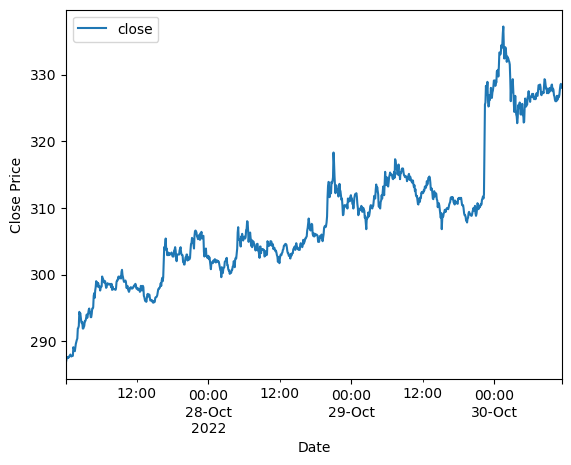

In [317]:
ax = data.plot(x='date', y='close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price")

In [318]:
# We can format the Date column and use its unique values as index.
data_study = data.copy()
data_study['date'] = data_study['date']
data_study.set_index(pd.to_datetime(data_study['date']), inplace=True)
data_study.drop('date', axis=1, inplace=True)
data_study

,time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,unused
date,,,,,,,,,,,,
2022-10-27 00:05:00-03:00,1666955700000,286.5,286.8,286.4,286.8,642.691,1666955999999,184228.7212,425,524.553,150373.2584,0
2022-10-27 00:10:00-03:00,1666956000000,286.8,287.3,286.6,287.2,1259.600,1666956299999,361364.9901,657,651.995,187079.8619,0
2022-10-27 00:15:00-03:00,1666956300000,287.2,287.6,287.2,287.6,1002.652,1666956599999,288222.6705,591,548.446,157665.0908,0
2022-10-27 00:20:00-03:00,1666956600000,287.6,287.6,287.1,287.5,1787.511,1666956899999,513746.4363,813,508.664,146222.7651,0
2022-10-27 00:25:00-03:00,1666956900000,287.4,287.8,287.4,287.6,1029.788,1666957199999,296168.2477,483,673.936,193807.3424,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-30 11:00:00-03:00,1667254200000,327.0,327.8,326.8,327.8,945.474,1667254499999,309396.8174,825,559.558,183115.2639,0
2022-10-30 11:05:00-03:00,1667254500000,327.8,328.6,327.5,328.4,2996.502,1667254799999,983066.0329,1410,1767.730,580071.7900,0
2022-10-30 11:10:00-03:00,1667254800000,328.5,328.8,328.1,328.6,2202.000,1667255099999,723185.7364,1206,1195.093,392487.5920,0


In [301]:
close_price = data_study['close']

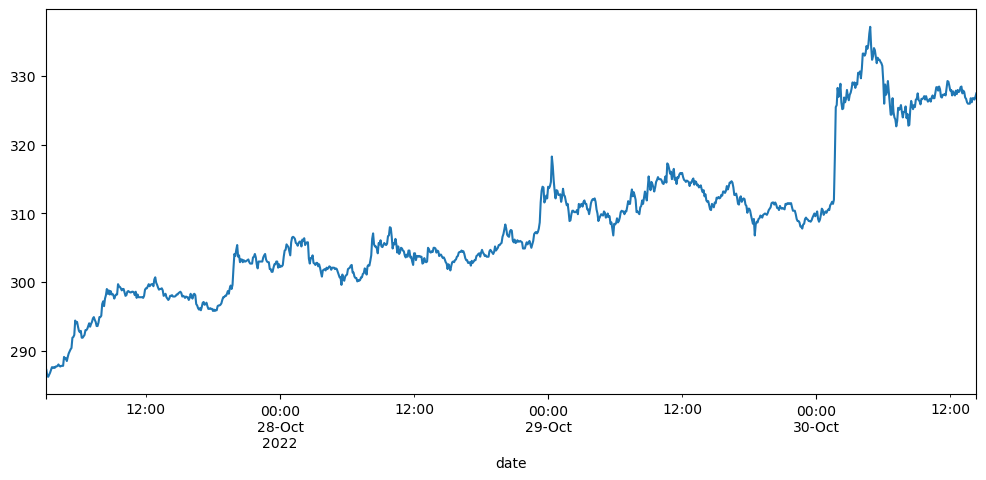

In [280]:
close_price.plot(figsize=(12, 5))
plt.show()

## Moving Average

In [281]:
rroll_p50 = close_price.rolling(window=50).mean()
rroll_p100 = close_price.rolling(window=100).mean()
rroll_p200 = close_price.rolling(window=200).mean()

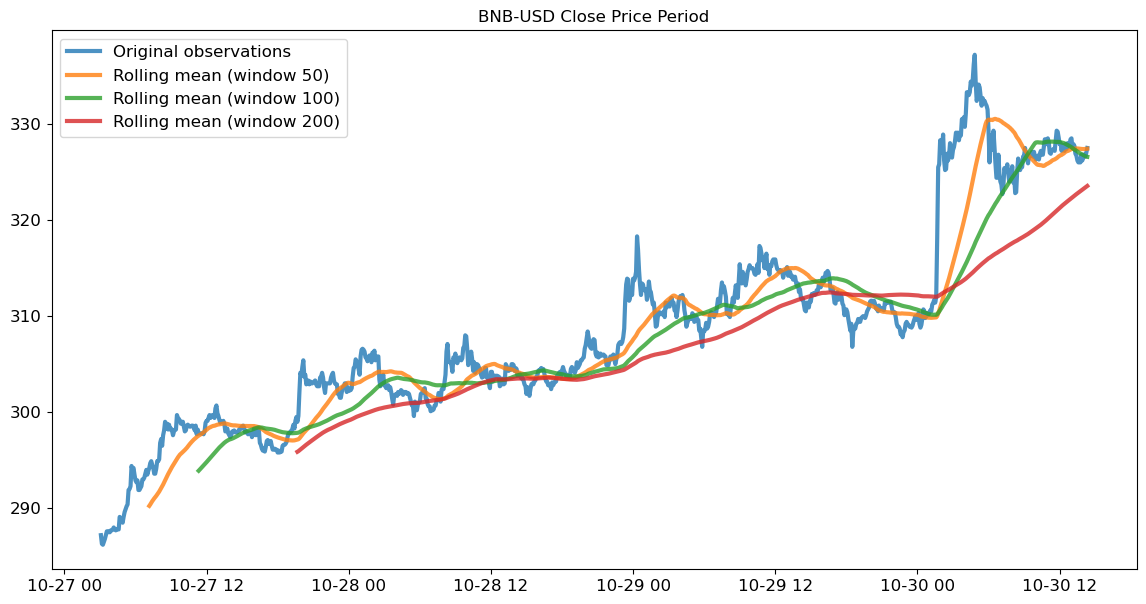

In [282]:
plt.figure(figsize=(14, 7))
plt.plot(close_price.index, close_price, lw=3, alpha=0.8,label='Original observations')
plt.plot(close_price.index, rroll_p50, lw=3, alpha=0.8,label='Rolling mean (window 50)')
plt.plot(close_price.index, rroll_p100, lw=3, alpha=0.8,label='Rolling mean (window 100)')
plt.plot(close_price.index, rroll_p200, lw=3, alpha=0.8,label='Rolling mean (window 200)')
plt.title('BNB-USD Close Price Period')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

## Dual Moving Average Crossover

In [283]:
short_window = 30
mid_window = 50

signals = pd.DataFrame(index=close_price.index)
signals['signal'] = 0.0

roll_pshort = close_price.rolling(window=short_window).mean()
roll_pmid = close_price.rolling(window=mid_window).mean()

signals['short_mavg'] = roll_pshort
signals['mid_mavg'] = roll_pmid
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['mid_mavg'][short_window:], 1.0, 0.0)
signals['positions'] = signals['signal'].diff()

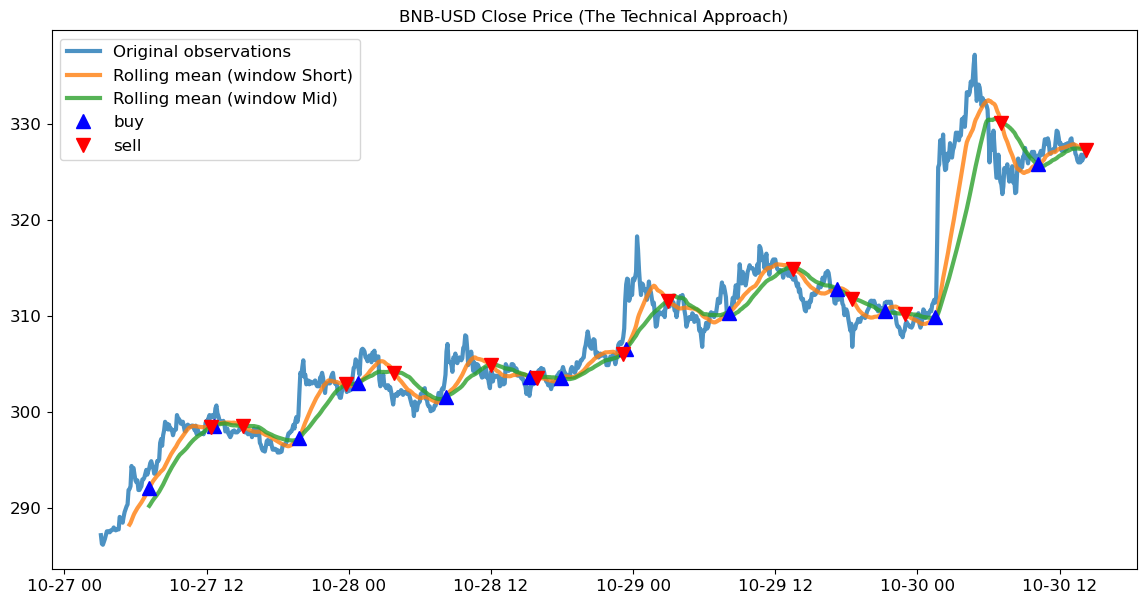

In [284]:
plt.figure(figsize=(14, 7))
plt.plot(close_price.index, close_price, lw=3, alpha=0.8,label='Original observations')
plt.plot(close_price.index, roll_pshort, lw=3, alpha=0.8,label='Rolling mean (window Short)')
plt.plot(close_price.index, roll_pmid, lw=3, alpha=0.8,label='Rolling mean (window Mid)')

plt.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='b', label='buy')
         
plt.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r', label='sell')

plt.title('BNB-USD Close Price (The Technical Approach)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [285]:
signals.loc[signals['positions'] == -1.0], signals.loc[signals['positions'] == 1.0]

(                           signal  short_mavg  mid_mavg  positions
 date                                                              
 2022-10-27 12:25:00+00:00     0.0  298.490000   298.506       -1.0
 2022-10-27 15:05:00+00:00     0.0  298.550000   298.568       -1.0
 2022-10-27 23:45:00+00:00     0.0  302.883333   302.936       -1.0
 2022-10-28 03:50:00+00:00     0.0  304.070000   304.162       -1.0
 2022-10-28 12:00:00+00:00     0.0  304.930000   304.956       -1.0
 2022-10-28 15:55:00+00:00     0.0  303.553333   303.566       -1.0
 2022-10-28 23:10:00+00:00     0.0  306.053333   306.090       -1.0
 2022-10-29 02:55:00+00:00     0.0  311.533333   311.676       -1.0
 2022-10-29 13:30:00+00:00     0.0  314.926667   314.986       -1.0
 2022-10-29 18:30:00+00:00     0.0  311.770000   311.908       -1.0
 2022-10-29 22:55:00+00:00     0.0  310.180000   310.262       -1.0
 2022-10-30 07:05:00+00:00     0.0  330.110000   330.264       -1.0
 2022-10-30 14:15:00+00:00     0.0  327.336667  

In [286]:
signals.tail(5)

,signal,short_mavg,mid_mavg,positions
date,,,,
2022-10-30 14:00:00+00:00,1.0,327.480000,327.386,0.0
2022-10-30 14:05:00+00:00,1.0,327.466667,327.390,0.0
2022-10-30 14:10:00+00:00,1.0,327.413333,327.396,0.0
2022-10-30 14:15:00+00:00,0.0,327.336667,327.406,-1.0
2022-10-30 14:20:00+00:00,0.0,327.280000,327.422,0.0


In [290]:
# Last Buy Position Change
last_buy_position = signals.loc[signals['positions'] == 1.0].tail(1)
last_buy_position['time_delta'] = (pd.Timestamp.now() - last_buy_position.index.values[0])
last_buy_position['hours_ago'] = last_buy_position['time_delta'] / pd.Timedelta(hours=1)
last_buy_position['mins_ago'] = last_buy_position['time_delta'] / pd.Timedelta(minutes=1)
last_buy_position

,signal,short_mavg,mid_mavg,positions,time_delta,hours_ago,mins_ago
date,,,,,,,
2022-10-30 10:10:00+00:00,1.0,325.79,325.74,1.0,1 days 09:06:34.480038,33.109578,1986.574667


In [258]:
# Last Sell Position Change
last_sell_position = signals.loc[signals['positions'] == -1.0].tail(1)
last_sell_position['time_delta'] = (pd.Timestamp.now() - last_sell_position.index.values[0])
last_sell_position['hours_ago'] = last_sell_position['time_delta'] / pd.Timedelta(hours=1)
last_sell_position['mins_ago'] = last_sell_position['time_delta'] / pd.Timedelta(minutes=1)
last_sell_position

,signal,short_mavg,mid_mavg,positions,time_delta,hours_ago,mins_ago
date,,,,,,,
2022-10-30 14:20:00,0.0,327.346667,327.412,-1.0,1 days 04:47:59.766675,28.799935,1727.996111


In [259]:
signals.iloc[-1]

signal          0.000000
short_mavg    327.346667
mid_mavg      327.412000
positions      -1.000000
Name: 2022-10-30 14:20:00, dtype: float64

In [260]:
if signals.iloc[-1].signal == 0:
    print("Last is under Sell")
else:
    print("Last is under Buy")

Last is under Sell


In [261]:
initial_investment = close_price.loc[list(signals[signals.positions == 1.0].index)][0]
bought = np.sum(close_price.loc[list(signals[signals.positions == 1.0].index)]*-1.0)
sold = np.sum(close_price.loc[list(signals[signals.positions == -1.0].index)])
current_value = close_price[-1]

balance = pd.DataFrame([close_price.loc[list(signals[signals.positions == 1.0].index)]*-1.0,
              close_price.loc[list(signals[signals.positions == -1.0].index)]]).transpose()
balance = balance.fillna(0)
balance['balance'] = balance.sum(axis=1)

print("Initial investment amount: {0:.2f} USD".format(initial_investment))
print("Maximum invested amount: {0:.2f} USD".format(abs(min(balance.cumsum().balance))))
print("Current asset value: {0:.2f} USD".format(bought+sold+current_value))

Initial investment amount: 293.90 USD
Maximum invested amount: 315.40 USD
Current asset value: 339.20 USD


## Exponential Moving Average

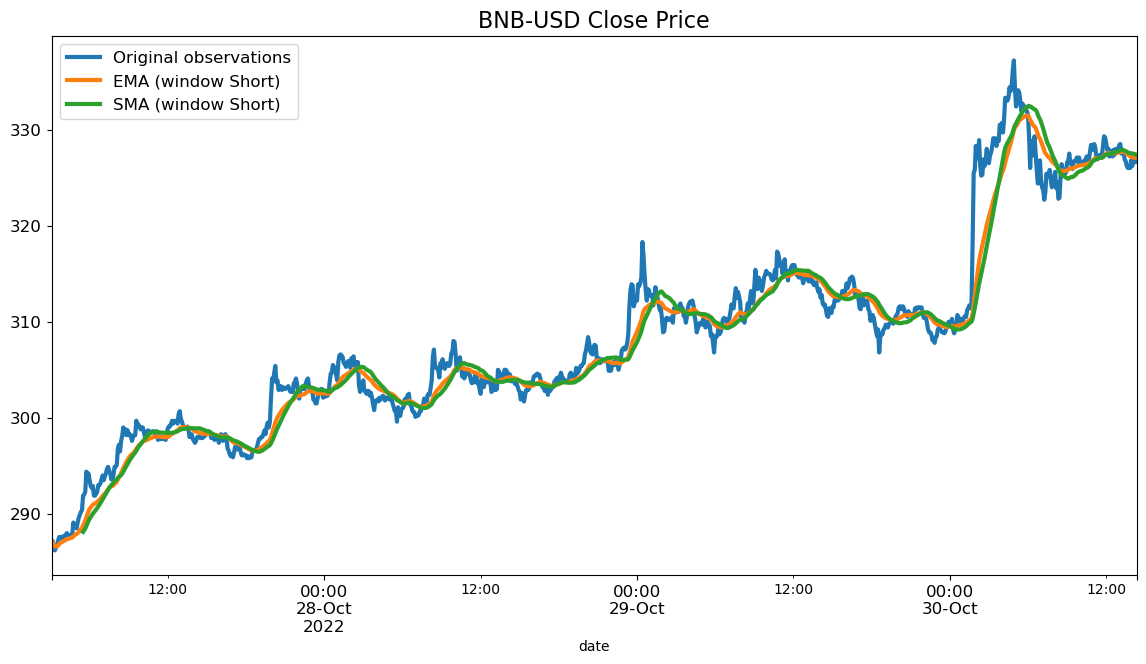

In [262]:
exp_weighted_mean = close_price.ewm(span=30).mean()
sma_pshort = close_price.rolling(window=30).mean()
ax = close_price.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='EMA (window Short)')
sma_pshort.plot(ax=ax, lw=3, label='SMA (window Short)')
plt.title('BNB-USD Close Price', fontsize=16)
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [263]:
exp_weighted_mean = close_price.ewm(span=30).mean()
signals_ema = pd.DataFrame(index=close_price.index)
signals_ema['signal'] = 0.0

signals_ema['original'] = close_price
signals_ema['EMA'] = exp_weighted_mean

signals_ema['signal'] = np.where(signals_ema['original'] 
                                            > signals_ema['EMA'], 1.0, 0.0)
signals_ema['positions'] = signals_ema['signal'].diff()

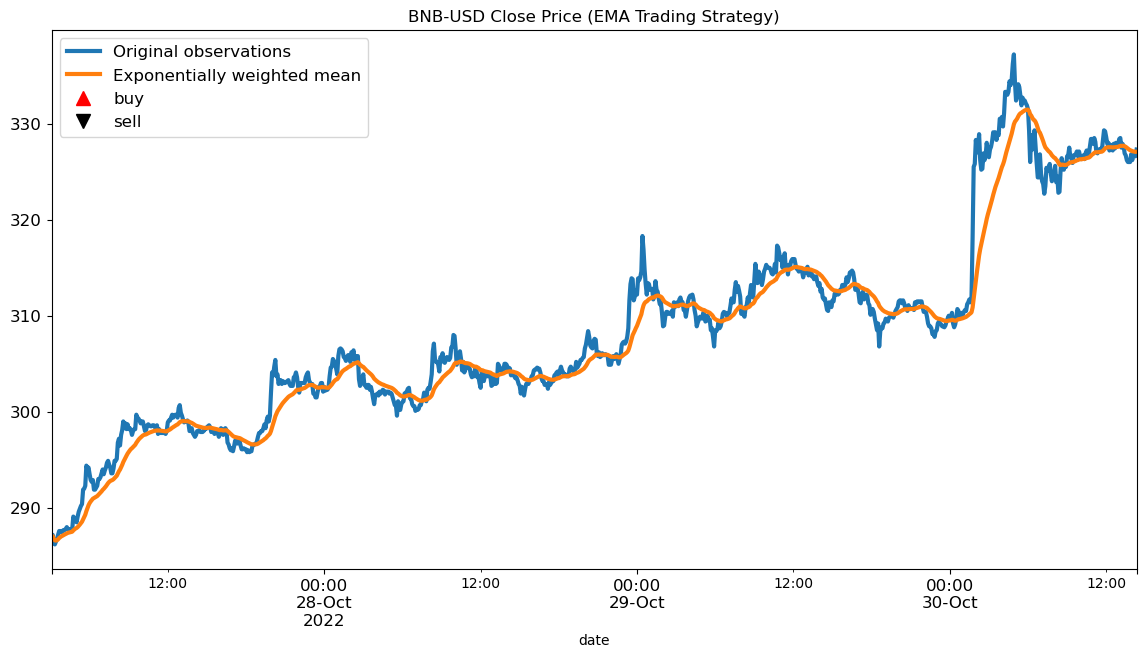

In [264]:
plt.figure(figsize=(14, 7))

ax = close_price.plot(lw=3, figsize=(14, 7), label='Original observations')
exp_weighted_mean.plot(ax=ax, lw=3, label='Exponentially weighted mean')

plt.plot(signals_ema.loc[signals_ema.positions == 1.0].index, 
         signals_ema.EMA[signals_ema.positions == 1.0],
         '^', markersize=10, color='r', label='buy')
         
plt.plot(signals_ema.loc[signals_ema.positions == -1.0].index, 
         signals_ema.EMA[signals_ema.positions == -1.0],
         'v', markersize=10, color='k', label='sell')

plt.title('BNB-USD Close Price (EMA Trading Strategy)')
plt.tick_params(labelsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [265]:
initial_investment = close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)][0]
bought = np.sum(close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)]*-1.0)
sold = np.sum(close_price.loc[list(signals_ema[signals_ema.positions == -1.0].index)])
current_value = close_price[-1]

balance_ema = pd.DataFrame([close_price.loc[list(signals_ema[signals_ema.positions == 1.0].index)]*-1.0,
              close_price.loc[list(signals_ema[signals_ema.positions == -1.0].index)]]).transpose()
balance_ema = balance_ema.fillna(0)
balance_ema['balance'] = balance_ema.sum(axis=1)

print("Initial investment amount: {0:.2f} USD".format(initial_investment))
print("Maximum invested amount: {0:.2f} USD".format(abs(min(balance_ema.cumsum().balance))))
print("Current asset value: {0:.2f} USD".format(bought+sold+current_value))

Initial investment amount: 287.20 USD
Maximum invested amount: 300.40 USD
Current asset value: 27.30 USD


In [266]:
signals

,signal,short_mavg,mid_mavg,positions
date,,,,
2022-10-27 03:05:00,0.0,NaN,NaN,NaN
2022-10-27 03:10:00,0.0,NaN,NaN,0.0
2022-10-27 03:15:00,0.0,NaN,NaN,0.0
2022-10-27 03:20:00,0.0,NaN,NaN,0.0
2022-10-27 03:25:00,0.0,NaN,NaN,0.0
...,...,...,...,...
2022-10-30 14:00:00,1.0,327.500000,327.392,0.0
2022-10-30 14:05:00,1.0,327.480000,327.386,0.0
2022-10-30 14:10:00,1.0,327.466667,327.390,0.0


In [267]:
signals_ema

,signal,original,EMA,positions
date,,,,
2022-10-27 03:05:00,0.0,286.9,286.900000,NaN
2022-10-27 03:10:00,1.0,287.2,287.055000,1.0
2022-10-27 03:15:00,0.0,286.3,286.786375,-1.0
2022-10-27 03:20:00,0.0,286.2,286.624808,0.0
2022-10-27 03:25:00,0.0,286.5,286.596411,0.0
...,...,...,...,...
2022-10-30 14:00:00,0.0,326.2,327.130748,0.0
2022-10-30 14:05:00,0.0,326.8,327.109409,0.0
2022-10-30 14:10:00,0.0,326.8,327.089447,0.0


In [269]:
pd.Timestamp.utcnow()

Timestamp('2022-10-31 22:10:29.035144+0000', tz='UTC')

In [270]:
pd.Timestamp.now()

Timestamp('2022-10-31 19:10:41.410270')